In [1]:
import matplotlib.pyplot as plt
import json

In [2]:
import torch

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
from gluonts.dataset.repository.datasets import get_dataset
from gluonts.dataset.util import to_pandas
from gluonts.evaluation import Evaluator
from gluonts.evaluation.backtest import make_evaluation_predictions

In [5]:
from pts.dataset.repository import dataset_recipes
from pts.model.tft import TemporalFusionTransformerEstimator
from pts import Trainer

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


In [6]:
dataset = get_dataset("pts_m5", regenerate=False)

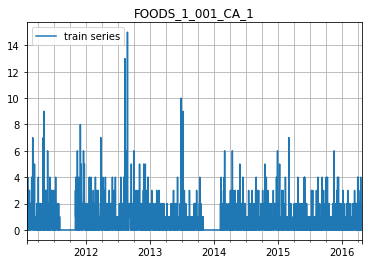

In [7]:
entry = next(iter(dataset.train))
train_series = to_pandas(entry)
train_series.plot()
plt.grid(which="both")
plt.legend(["train series"], loc="upper left")
plt.title(entry['item_id'])
plt.show()

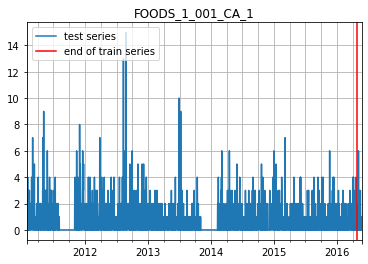

In [8]:
entry = next(iter(dataset.test))
test_series = to_pandas(entry)
test_series.plot()
plt.axvline(train_series.index[-1], color='r') # end of train dataset
plt.grid(which="both")
plt.legend(["test series", "end of train series"], loc="upper left")
plt.title(entry['item_id'])
plt.show()

In [9]:
dataset.metadata

MetaData(freq='D', target=None, feat_static_cat=[CategoricalFeatureInfo(name='state_id', cardinality='3'), CategoricalFeatureInfo(name='store_id', cardinality='10'), CategoricalFeatureInfo(name='cat_id', cardinality='3'), CategoricalFeatureInfo(name='dept_id', cardinality='7'), CategoricalFeatureInfo(name='item_id', cardinality='3049')], feat_static_real=[], feat_dynamic_real=[BasicFeatureInfo(name='sell_price'), BasicFeatureInfo(name='event_1'), BasicFeatureInfo(name='event_2'), BasicFeatureInfo(name='snap')], feat_dynamic_cat=[], prediction_length=28)

In [10]:
print(f"Recommended prediction horizon: {dataset.metadata.prediction_length}")
print(f"Frequency of the time series: {dataset.metadata.freq}")

Recommended prediction horizon: 28
Frequency of the time series: D


In [33]:
estimator = TemporalFusionTransformerEstimator(
    freq=dataset.metadata.freq,
    prediction_length=dataset.metadata.prediction_length,
    context_length=dataset.metadata.prediction_length*5,
    dropout_rate=0.1,
    num_outputs=15,
    trainer=Trainer(device=device,
                    epochs=20,
                    learning_rate=1e-3,
                    num_batches_per_epoch=100,
                    batch_size=128,
                   )
)

In [34]:
predictor = estimator.train(dataset.train, num_workers=8, shuffle_buffer_length=1024)

0it [00:00, ?it/s]/home/kashif/.env/pytorch/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py:63: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return default_collate([torch.as_tensor(b) for b in batch])
/home/kashif/.env/pytorch/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py:63: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable b

/home/kashif/.env/pytorch/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py:63: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return default_collate([torch.as_tensor(b) for b in batch])
/home/kashif/.env/pytorch/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py:63: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting i

/home/kashif/.env/pytorch/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py:63: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return default_collate([torch.as_tensor(b) for b in batch])
/home/kashif/.env/pytorch/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py:63: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting i

/home/kashif/.env/pytorch/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py:63: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return default_collate([torch.as_tensor(b) for b in batch])
99it [00:10,  9.85it/s, avg_epoch_loss=0.0626, epoch=4]
0it [00:00, ?it/s]/home/kashif/.env/pytorch/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py:63: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to c

1it [00:02,  2.62s/it, avg_epoch_loss=0.0632, epoch=6]/home/kashif/.env/pytorch/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py:63: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return default_collate([torch.as_tensor(b) for b in batch])
/home/kashif/.env/pytorch/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py:63: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to pro

/home/kashif/.env/pytorch/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py:63: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return default_collate([torch.as_tensor(b) for b in batch])
/home/kashif/.env/pytorch/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py:63: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting i

99it [00:10,  9.64it/s, avg_epoch_loss=0.0613, epoch=9]
0it [00:00, ?it/s]/home/kashif/.env/pytorch/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py:63: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return default_collate([torch.as_tensor(b) for b in batch])
/home/kashif/.env/pytorch/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py:63: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to c

/home/kashif/.env/pytorch/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py:63: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return default_collate([torch.as_tensor(b) for b in batch])
1it [00:02,  2.67s/it, avg_epoch_loss=0.0579, epoch=11]/home/kashif/.env/pytorch/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py:63: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to pr

/home/kashif/.env/pytorch/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py:63: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return default_collate([torch.as_tensor(b) for b in batch])
/home/kashif/.env/pytorch/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py:63: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting i

/home/kashif/.env/pytorch/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py:63: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return default_collate([torch.as_tensor(b) for b in batch])
/home/kashif/.env/pytorch/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py:63: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting i

/home/kashif/.env/pytorch/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py:63: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return default_collate([torch.as_tensor(b) for b in batch])
99it [00:10,  9.57it/s, avg_epoch_loss=0.0612, epoch=16]
0it [00:00, ?it/s]/home/kashif/.env/pytorch/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py:63: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to 

/home/kashif/.env/pytorch/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py:63: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return default_collate([torch.as_tensor(b) for b in batch])
/home/kashif/.env/pytorch/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py:63: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting i

In [35]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=dataset.test,  # test dataset
    predictor=predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)

In [36]:
forecasts = list(forecast_it)
tss = list(ts_it)

In [37]:
evaluator = Evaluator()
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(dataset.test))

Running evaluation: 100%|██████████| 30490/30490 [00:00<00:00, 73264.53it/s]


In [38]:
print(json.dumps(agg_metrics, indent=4))

{
    "MSE": 5.050131371510992,
    "abs_error": 825300.8760404031,
    "abs_target_sum": 1231764.0,
    "abs_target_mean": 1.4428196598416343,
    "seasonal_error": 1.1272178349378457,
    "MASE": 0.8942878068619854,
    "MAPE": 0.7959536171820637,
    "sMAPE": 1.5777253903358783,
    "OWA": NaN,
    "MSIS": NaN,
    "QuantileLoss[0.1]": 235492.3691656391,
    "Coverage[0.1]": 0.0841399990629246,
    "QuantileLoss[0.2]": 432733.80553320213,
    "Coverage[0.2]": 0.16420606287775852,
    "QuantileLoss[0.3]": 598878.4456814768,
    "Coverage[0.3]": 0.2313885114557466,
    "QuantileLoss[0.4]": 731890.6043083849,
    "Coverage[0.4]": 0.33211357353699106,
    "QuantileLoss[0.5]": 825300.8755625215,
    "Coverage[0.5]": 0.4319109309843977,
    "QuantileLoss[0.6]": 875338.4524397269,
    "Coverage[0.6]": 0.5821979103218853,
    "QuantileLoss[0.7]": 866631.8245184756,
    "Coverage[0.7]": 0.6952033453591342,
    "QuantileLoss[0.8]": 776677.5575613247,
    "Coverage[0.8]": 0.790309469146793,
  

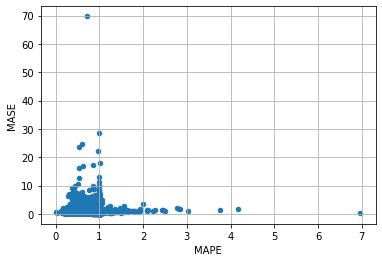

In [39]:
item_metrics.plot(x='MAPE', y='MASE', kind='scatter')
plt.grid(which="both")
plt.show()

In [40]:
item_metrics[item_metrics.MAPE > 3]

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,...,QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.6],Coverage[0.6],QuantileLoss[0.7],Coverage[0.7],QuantileLoss[0.8],Coverage[0.8],QuantileLoss[0.9],Coverage[0.9]
6828,FOODS_3_070_WI_2,531.909877,518.847107,569.0,20.321429,17.788732,1.041685,3.032136,0.946577,NaN,...,518.847116,0.642857,518.082115,0.750000,510.659755,0.892857,477.338791,0.964286,348.039331,0.964286
8462,FOODS_3_234_CA_3,43.477325,176.806824,2.0,0.071429,15.951334,0.395862,6.970813,1.966008,NaN,...,176.806829,1.000000,241.263911,1.000000,247.255903,1.000000,217.906344,1.000000,164.628036,1.000000
8468,FOODS_3_234_WI_2,1899.364955,935.622803,1089.0,38.892857,22.698745,1.472112,3.761671,1.129167,NaN,...,935.622761,0.428571,988.843789,0.535714,935.429903,0.571429,751.070375,0.714286,493.297098,0.892857
9742,FOODS_3_362_CA_3,362.378557,456.977081,313.0,11.178571,8.542276,1.910569,4.160606,1.190415,NaN,...,456.977058,0.750000,462.123611,0.928571,425.437444,0.964286,371.548067,1.000000,257.005370,1.000000


In [29]:
def plot_quantiles(ts_entry, forecast_entry, prediction_length, path=None, sample_id=None, inline=True):
    plot_length = 150

    _, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)
    forecast_entry.plot(color='g')
    ax.axvline(ts_entry.index[-prediction_length], color='r')
    if inline:
        plt.show()
        plt.clf()
    else:
        plt.savefig('{}forecast_{}.pdf'.format(path, sample_id))
        plt.close()

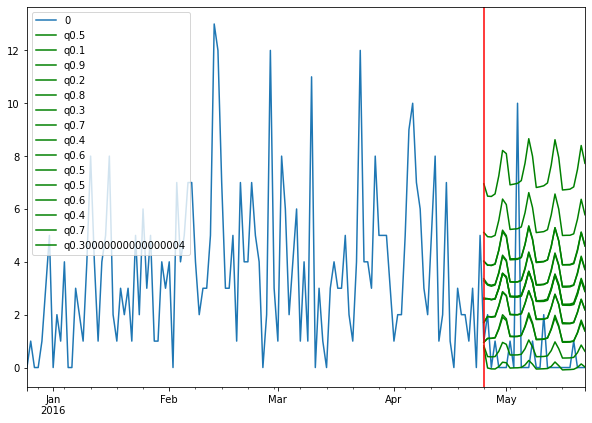

<Figure size 432x288 with 0 Axes>

In [48]:
plot_quantiles(tss[1585], forecasts[1585], dataset.metadata.prediction_length)